In [122]:
import pickle as pkl
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


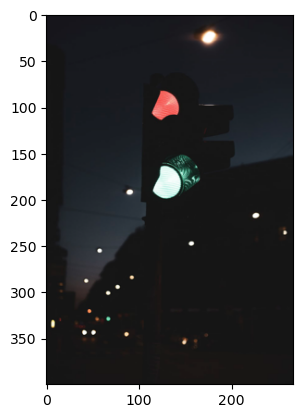

In [55]:
with open('images.pkl', 'rb') as f:
    images = pkl.load(f)

plt.imshow(images[0])

In [148]:
with open('target.pkl', 'rb') as f:
    labels = pkl.load(f)

print(labels[0])

trafficlight


In [149]:
# Get all the sizes into a list, then convert to a set
sizes = set([img.shape for img in images])
print(sizes)

{(273, 400, 3), (257, 400, 3), (235, 400, 3), (400, 267, 3), (400, 300, 3), (248, 400, 3), (270, 400, 3), (246, 400, 3), (400, 306, 3), (385, 400, 3), (242, 400, 3), (266, 400, 3), (244, 400, 3), (222, 400, 3), (267, 400, 3), (400, 332, 3), (268, 400, 3), (400, 268, 3), (166, 400, 3), (290, 400, 3), (229, 400, 3), (228, 400, 3), (301, 400, 3), (269, 400, 3), (281, 400, 3), (400, 321, 3), (200, 400, 3), (400, 266, 3), (302, 400, 3), (400, 400, 3), (252, 400, 3), (337, 400, 3), (293, 400, 3), (265, 400, 3), (300, 400, 3), (247, 400, 3), (225, 400, 3), (272, 400, 3), (364, 400, 3), (400, 395, 3), (283, 400, 3), (400, 320, 3), (227, 400, 3), (400, 254, 3), (284, 400, 3), (274, 400, 3)}


In [150]:
sizes_df = pd.DataFrame([[img.shape[0], img.shape[1]] for img in images], columns=['height', 'width'])
sizes_df['height'].value_counts()

height
400    782
267     31
301     13
300      7
225      5
269      4
228      2
247      2
266      2
273      2
283      2
293      1
222      1
166      1
244      1
252      1
337      1
281      1
265      1
302      1
235      1
200      1
274      1
246      1
364      1
385      1
242      1
272      1
270      1
290      1
284      1
268      1
257      1
229      1
248      1
227      1
Name: count, dtype: int64

In [151]:
sizes_df['width'].value_counts()

width
300    731
400     99
267     29
320      6
268      5
266      2
306      1
321      1
395      1
254      1
332      1
Name: count, dtype: int64

In [152]:
images[0].shape

(400, 267, 3)

In [153]:
target_size = (300, 400)

cv2.resize(images[0], (300, 400)).shape

(400, 300, 3)

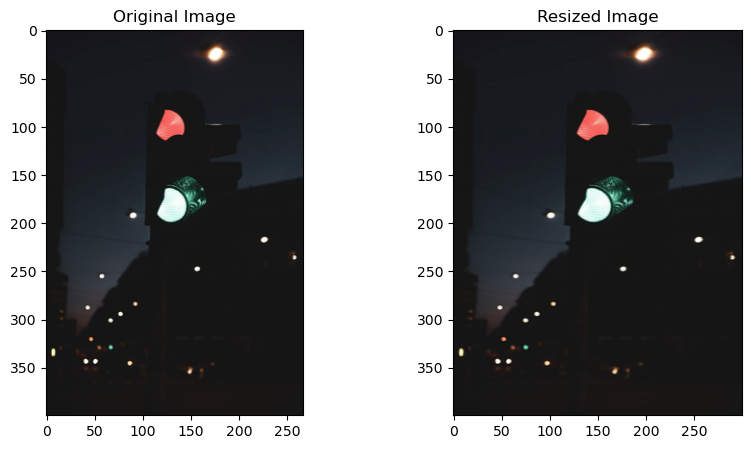

In [154]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(images[0])
axes[0].set_title('Original Image')
axes[1].imshow(cv2.resize(images[0], (300, 400)))
axes[1].set_title('Resized Image')
plt.show()

In [183]:
resized_images = [cv2.resize(img, target_size) for img in images]
sizes = set([img.shape for img in resized_images])
print(sizes)

{(400, 300, 3)}


In [184]:
resized_images[0]

array([[[22, 21, 27],
        [22, 21, 27],
        [22, 21, 27],
        ...,
        [22, 21, 27],
        [22, 21, 27],
        [22, 21, 27]],

       [[22, 21, 27],
        [22, 21, 27],
        [22, 21, 27],
        ...,
        [22, 21, 27],
        [22, 21, 27],
        [22, 21, 27]],

       [[22, 21, 27],
        [22, 21, 27],
        [22, 21, 27],
        ...,
        [22, 21, 27],
        [22, 21, 27],
        [22, 21, 27]],

       ...,

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]]], dtype=uint8)

In [185]:
# Convert all images to floating point numpy arrays
float_images = [np.array(img).astype(np.float32) for img in resized_images]
float_images[0]

array([[[22., 21., 27.],
        [22., 21., 27.],
        [22., 21., 27.],
        ...,
        [22., 21., 27.],
        [22., 21., 27.],
        [22., 21., 27.]],

       [[22., 21., 27.],
        [22., 21., 27.],
        [22., 21., 27.],
        ...,
        [22., 21., 27.],
        [22., 21., 27.],
        [22., 21., 27.]],

       [[22., 21., 27.],
        [22., 21., 27.],
        [22., 21., 27.],
        ...,
        [22., 21., 27.],
        [22., 21., 27.],
        [22., 21., 27.]],

       ...,

       [[21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.],
        ...,
        [21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.]],

       [[21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.],
        ...,
        [21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.]],

       [[21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.],
        ...,
        [21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.]]

In [186]:
# Normalize images to a range between 0 and 1 by dividing all pixel values by the max of 255
normalized_images = [img/255 for img in float_images]
normalized_images[0]

array([[[0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        ...,
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235]],

       [[0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        ...,
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235]],

       [[0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        ...,
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235]],

       ...,

       [[0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0

In [187]:
X = np.array(normalized_images)
X[0]

array([[[0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        ...,
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235]],

       [[0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        ...,
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235]],

       [[0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        ...,
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235]],

       ...,

       [[0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0

In [210]:
y_label_encoder = LabelEncoder()
y_label_encoder.fit(labels)
y = y_label_encoder.transform(labels)
y[:100]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [189]:
list(y_label_encoder.classes_)

['crosswalk', 'speedlimit', 'stop', 'trafficlight']

In [190]:
# Get the count of each value in y
unique, counts = np.unique(y, return_counts=True) 
print(np.asarray((unique, counts)).T)

[[  0  88]
 [  1 652]
 [  2  76]
 [  3  61]]


In [191]:
# Split the training dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
# Define the augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.1),     # Random rotation (10 degrees)
    tf.keras.layers.RandomRotation(0.2),         # Random rotation (20 degrees)
    tf.keras.layers.RandomTranslation(0.1, 0.1), # Random horizontal and vertical shift
    tf.keras.layers.RandomTranslation(0.2, 0.2), # Random horizontal and vertical shift
    tf.keras.layers.RandomZoom(0.1),             # Random zoom
    tf.keras.layers.RandomZoom(0.2),             # Random zoom
    tf.keras.layers.RandomContrast(0.1),         # Random contrast
    tf.keras.layers.RandomContrast(0.2),         # Random contrast   
])

In [193]:
# Create an empty list for X and y augmentations
X_train_aug = []
y_train_aug = []

# Loop through the entire X_train set
for i in range(len(X_train)):
    # Select the original image and its y label
    img = X_train[i]
    label = y_train[i]
   
    # Ensure that the input data has the correct shape
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # If the label is not 1 (i.e. not a speedlimit), augment the image
    if label != 1:
        # Add 8 new images for every original
        for j in range(8):
            # Create and append the image
            X_train_aug.append(data_augmentation(img, training=True)[0].numpy())
            # Append the original label
            y_train_aug.append(label)
    else:
        # Append the original image and label
        X_train_aug.append(data_augmentation(img, training=True)[0].numpy())
        y_train_aug.append(label)

# Print the length of the augmented images and the labels
print(len(X_train_aug))
print(len(y_train_aug))

2010
2010


In [194]:
# One hot encode the y data
y_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(np.array(y_train_aug).reshape(-1, 1))
y_train_aug_enc = y_encoder.transform(np.array(y_train_aug).reshape(-1, 1))
y_test_enc = y_encoder.transform(np.array(y_test).reshape(-1, 1))

In [195]:
# Convert values to numpy arrays
X_train_aug_np = np.array(X_train_aug)
X_test_np = np.array(X_test)
y_train_aug_np = np.array(y_train_aug_enc)
y_test_np = np.array(y_test_enc)

In [196]:
# Print the total number of one_hot_encoded columns
np.array(y_train).shape

(701,)

In [197]:
# Create a dictionary to store the train/test data
data = {
    'X_train': X_train_aug_np,
    'X_test': X_test_np,
    'y_train': y_train_aug_np,
    'y_test': y_test_np
}

# Save the dictionary to a pickle file
with open('signs_dict.pkl', 'wb') as f:
    pkl.dump(data, f)

In [198]:
# Load the dictionary from the pickle file
with open('signs_dict.pkl', 'rb') as f:
    data = pkl.load(f)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


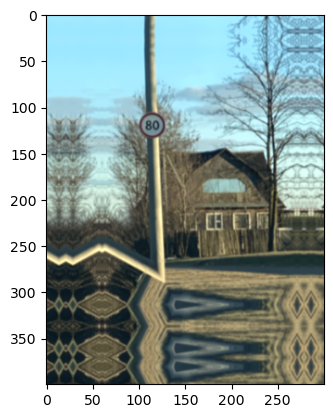

In [199]:
plt.imshow(data['X_train'][2007])

In [200]:
X_train = np.array(data['X_train'])
X_test = np.array(data['X_test'])
y_train = np.array(data['y_train'])
y_test = np.array(data['y_test'])

In [201]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(2010, 4)
(2010, 400, 300, 3)
(176, 4)
(176, 400, 300, 3)


In [202]:
# Define a CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(400, 300, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes
])

In [203]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 398, 298, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 199, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 197, 147, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 98, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 96, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 436224)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │    27,918,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,974,980 (106.72 MB)

 Trainable params: 27,974,980 (106.72 MB)

 Non-trainable params: 0 (0.00 B)

In [204]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [205]:
# Train the model
batch_size = 32
epochs = 10
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 486ms/step - accuracy: 0.3709 - loss: 5.2305 - val_accuracy: 0.1250 - val_loss: 1.3651
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 476ms/step - accuracy: 0.5582 - loss: 1.0458 - val_accuracy: 0.3068 - val_loss: 1.7451
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 482ms/step - accuracy: 0.7545 - loss: 0.7217 - val_accuracy: 0.4886 - val_loss: 1.6590
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 480ms/step - accuracy: 0.8516 - loss: 0.4363 - val_accuracy: 0.6023 - val_loss: 1.5457
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 468ms/step - accuracy: 0.9360 - loss: 0.2046 - val_accuracy: 0.5170 - val_loss: 2.7396
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 461ms/step - accuracy: 0.9670 - loss: 0.1331 - val_accuracy: 0.5227 - val_loss: 2.4088
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 444ms/step - accuracy: 0.9782 - loss: 0.1001 - val_accuracy: 0.3352 - val_loss: 6.4032
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 445ms/step - accuracy: 0.9870 - loss: 0.0533 - val_accu

In [206]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.4079 - loss: 5.0538 


[4.924879550933838, 0.40909090638160706]

In [207]:
predictions = model.predict(X_test, verbose=2)
predictions

6/6 - 1s - 93ms/step


array([[5.05138859e-02, 8.03147554e-01, 3.70946750e-02, 1.09243885e-01],
       [8.03248084e-04, 1.07423088e-03, 8.52825833e-05, 9.98037279e-01],
       [1.84797227e-01, 8.13172996e-01, 9.52103583e-05, 1.93455291e-03],
       [1.73554912e-01, 7.50324488e-01, 4.19305544e-03, 7.19275624e-02],
       [3.73104922e-02, 9.57744062e-01, 4.95708548e-04, 4.44978755e-03],
       [9.99847054e-01, 1.21385337e-05, 5.32138017e-07, 1.40288248e-04],
       [6.51957214e-01, 1.62865475e-01, 1.85158402e-01, 1.88448030e-05],
       [5.93432551e-03, 9.82082486e-01, 2.10177604e-05, 1.19621931e-02],
       [9.39891487e-02, 1.84941083e-01, 1.30401805e-01, 5.90667963e-01],
       [2.17655256e-27, 1.76157314e-24, 3.46299121e-14, 1.00000000e+00],
       [2.76834011e-01, 5.23665071e-01, 1.70223251e-01, 2.92776804e-02],
       [6.28933370e-01, 6.53044495e-04, 6.03320075e-07, 3.70413035e-01],
       [9.89466727e-01, 1.04094278e-02, 7.24037673e-05, 5.13840823e-05],
       [9.99999881e-01, 2.48500109e-10, 1.27858911e

In [208]:
# Run a classification report on the predictions
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.06      0.60      0.10         5
           1       0.95      0.38      0.55       138
           2       0.38      0.55      0.45        20
           3       0.13      0.38      0.20        13

    accuracy                           0.41       176
   macro avg       0.38      0.48      0.32       176
weighted avg       0.80      0.41      0.50       176



In [211]:
predictions_df = pd.DataFrame(predictions, columns=list(y_label_encoder.classes_))
predictions_df = round(predictions_df, 5)
predictions_df.head(25)

,crosswalk,speedlimit,stop,trafficlight
0,0.05051,0.80315,0.03709,0.10924
1,0.00080,0.00107,0.00009,0.99804
2,0.18480,0.81317,0.00010,0.00193
3,0.17355,0.75032,0.00419,0.07193
4,0.03731,0.95774,0.00050,0.00445
5,0.99985,0.00001,0.00000,0.00014
6,0.65196,0.16287,0.18516,0.00002
7,0.00593,0.98208,0.00002,0.01196
8,0.09399,0.18494,0.13040,0.59067
9,0.00000,0.00000,0.00000,1.00000


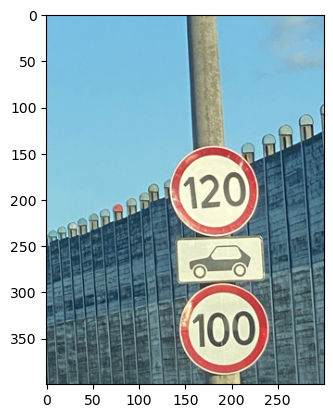

In [212]:
plt.imshow(X_test[1])